# Time Series prediction

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime

In [18]:
raw_data = [1, 1, 2, 1, 1, 3, 3, 4, 1, 1]

In [50]:
data = pd.read_csv('data/data.csv')
data

,volume
0,3369900
1,5632100
2,4983500
3,4706700
4,6102400
5,6234800
6,7385000
7,9451300
8,8708000
9,8526900


In [84]:
data.loc[19]=1000000
data

,volume
0,3.369900e+06
1,5.632100e+06
2,4.983500e+06
3,4.706700e+06
4,6.102400e+06
5,6.234800e+06
6,7.385000e+06
7,9.451300e+06
8,8.708000e+06
9,8.526900e+06


In [85]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(data['volume'], order=(0,1,1))
res = mod.fit(disp=True)
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                 volume   No. Observations:                   21
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -329.496
Date:                Sun, 18 Aug 2019   AIC                            662.992
Time:                        11:58:25   BIC                            664.984
Sample:                             0   HQIC                           663.381
                                 - 21                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5934      0.164     -3.628      0.000      -0.914      -0.273
sigma2      1.315e+13   2.37e-15   5.55e+27      0.000    1.32e+13    1.32e+13
Ljung-Box (Q):                        9.55   Jarque-

In [86]:
v = res.get_prediction()
v.predicted_mean

0     0.000000e+00
1     1.890967e+06
2     3.598584e+06
3     4.185299e+06
4     4.400398e+06
5     5.095979e+06
6     5.559858e+06
7     6.302430e+06
8     7.583043e+06
9     8.040485e+06
10    8.238266e+06
11    7.866808e+06
12    1.193350e+07
13    9.049937e+06
14    7.284143e+06
15    6.506505e+06
16    5.642074e+06
17    5.675913e+06
18    5.326883e+06
19    4.770012e+06
20    3.237129e+06
dtype: float64

In [87]:
forecast = res.forecast().loc[20]
forecast

KeyError: 'the label [20] is not in the [index]'

In [58]:
data.loc[20] = forecast

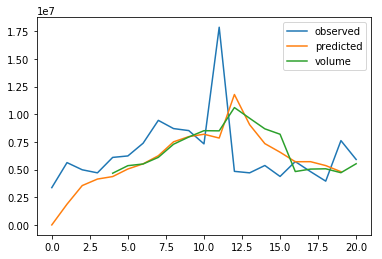

In [83]:
ax = data.plot(y='volume', label='observed')
v.predicted_mean.plot(ax = ax, label='predicted')
data.shift(periods=1).rolling(window=4).mean().plot(ax=ax, label='movavg')
plt.legend()